# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Part One Instructions

Implement an **unsmoothed bigram language model** in Python. Train your model on the following toy corpus:

\<s> a b \</s>  
\<s> b b \</s>  
\<s> b a \</s>  
\<s> a a \</s>  

Calculate and print out the probability of each of the following strings:

\<s> b \</s>  
\<s> a \</s>  
\<s> a b \</s>  
\<s> a a \</s>  
\<s> a b a \</s>  

# Part One

The first step for this part is to create a class in Python to represent the unsmoothed bigram LM. I made a function to calcuate the probability of a word sequence in both normal and log space.

In [4]:
class UnsmoothedBigramLM:
    """
    Class to represent an unsmoothed bigram LM.
    """

    def __init__(self, corpus=[]):
        """
        Corpus object is a list of the sentences in the corpus as strings.
        Sentence start and end markers appear in each string.
        The unigrams and bigrams are extracted on instantiation.
        """
        self.corpus = corpus
        self.unigram_counts = self.count_unigrams(corpus)
        self.bigram_counts = self.count_bigrams(corpus)

    def count_unigrams(self, corpus):
        """
        Creates a dict with every unigram in the corpus and 
        a count of how many times it appears in the corpus.
        """
        counts = {}
        for s in corpus:
            # Tokenise sentence
            toks = s.split()
            for tok in toks:
                # Normalise case
                tok = tok.casefold()
                if tok in counts:
                    counts[tok] += 1
                else:
                    counts[tok] = 1
        # Return dict with unigram counts
        return counts

    def count_bigrams(self, corpus):
        """
        Creates a dict with every bigram in the corpus and 
        a count of how many times it appears in the corpus.
        """
        counts = {}
        for s in corpus:
            # Tokenise sentence
            toks = s.split()
            for tok1, tok2 in zip(toks, toks[1:]):
                # Normalise case
                tok1 = tok1.casefold()
                tok2 = tok2.casefold()
                bigram = (tok1, tok2)
                if bigram in counts:
                    counts[bigram] += 1
                else:
                    counts[bigram] = 1
        #Return dict with bigram counts
        return counts
        
                 
    def p_unigram(self, word):
        """
        Returns the probability of a unigram w.
        """
        # Strip whitespace and normalise case
        w = word.strip().casefold()

        # Make sure w is only one word
        if len(w.split()) > 1:
            raise ValueError

        #  p(w) = return count("w") / count(unigrams)
        return self.unigram_counts[w] / sum(self.unigram_counts.values())
    
    def p_bigram(self, word, prev_word):
        """
        Returns the probability of a bigram - "prev_word word".
        """
        # Strip whitespace and normalise case
        w1 = prev_word.strip().casefold()
        w2 = word.strip().casefold()

        # Make sure both are one word
        if (len(w1.split()) > 1) or (len(w2.split()) > 1):
            raise ValueError
        
        # p(w2 | w1) = count("w1 w2") / count("w1")
        try:
            bigram = (w1, w2)
            return self.bigram_counts[bigram] / self.unigram_counts[w1]
        except KeyError:
            return 0

    def p_word_seq(self, s):
        """
        Returns the probability of a word sequence s.
        """
        # Strip whitespace, normalise case and tokenise
        toks = s.strip().casefold().split()
        
        probs = []
        probs.append(self.p_unigram(toks[0]))
        for prev, curr in zip(toks, toks[1:]):
            probs.append(self.p_bigram(curr, prev))
        
        #Return product of probs
        return np.prod(probs), self.p_log_space(probs)
    
    def p_log_space(self, probs):
        """
        Returns the log probability of list of word probabilities.
        """
        total = 0
        for p in probs:
            total += np.log(p)
        return total

The next step is to instantiate our model using the toy corpus for training.

In [5]:
# Training data
toy_corpus = ["<s> a b </s>",
              "<s> b b </s>",
              "<s> b a </s>",
              "<s> a a </s>"]

In [6]:
LM = UnsmoothedBigramLM(toy_corpus)

Checking if unigram and bigrams counts were carried out correctly.

In [7]:
LM.unigram_counts

{'<s>': 4, 'a': 4, 'b': 4, '</s>': 4}

In [8]:
LM.bigram_counts

{('<s>', 'a'): 2,
 ('a', 'b'): 1,
 ('b', '</s>'): 2,
 ('<s>', 'b'): 2,
 ('b', 'b'): 1,
 ('b', 'a'): 1,
 ('a', '</s>'): 2,
 ('a', 'a'): 1}

## Calculating Probabilities

Next, we calculate and print out the probability of each of the following strings:  

\<s> b \</s>  
\<s> a \</s>  
\<s> a b \</s>  
\<s> a a \</s>  
\<s> a b a \</s>  

In [9]:
# Initialise list to store probabilities
probs = []

In [10]:
s1 = "<s> b </s>"

print("String: ", s1)
prob, log_prob = LM.p_word_seq(s1)
print("Probability: ", prob)
print("Log Probability: ", log_prob)

probs.append(["s1", s1, prob, log_prob])

String:  <s> b </s>
Probability:  0.0625
Log Probability:  -2.772588722239781


In [11]:
s2 = "<s> a </s>"

print("String: ", s2)
prob, log_prob = LM.p_word_seq(s2)
print("Probability: ", prob)
print("Log Probability: ", log_prob)

probs.append(["s2", s2, prob, log_prob])

String:  <s> a </s>
Probability:  0.0625
Log Probability:  -2.772588722239781


In [12]:
s3 = "<s> a b </s>"
print("String: ", s3)
prob, log_prob = LM.p_word_seq(s3)
print("Probability: ", prob)
print("Log Probability: ", log_prob)

probs.append(["s3", s3, prob, log_prob])

String:  <s> a b </s>
Probability:  0.015625
Log Probability:  -4.1588830833596715


In [13]:
s4 = "<s> a a </s>"
print("String: ", s4)
prob, log_prob = LM.p_word_seq(s4)
print("Probability: ", prob)
print("Log Probability: ", log_prob)

probs.append(["s4", s4, prob, log_prob])

String:  <s> a a </s>
Probability:  0.015625
Log Probability:  -4.1588830833596715


In [14]:
s5 = "<s> a b a </s>"
print("String: ", s5)
prob, log_prob = LM.p_word_seq(s5)
print("Probability: ", prob)
print("Log Probability: ", log_prob)

probs.append(["s5", s5, prob, log_prob])

String:  <s> a b a </s>
Probability:  0.00390625
Log Probability:  -5.545177444479562


## Plot of Probabilities  

Next, we can plot the probabilities on a bar chart to see how the sentences compare to each other in terms of how probable they are.

In [15]:
df_probs = pd.DataFrame.from_records(probs, columns=["sentence", "text", "prob", "log_prob"])

In [16]:
df_probs

,sentence,text,prob,log_prob
0,s1,<s> b </s>,0.062500,-2.772589
1,s2,<s> a </s>,0.062500,-2.772589
2,s3,<s> a b </s>,0.015625,-4.158883
3,s4,<s> a a </s>,0.015625,-4.158883
4,s5,<s> a b a </s>,0.003906,-5.545177


Bar chart for normal probabilities..

<AxesSubplot:xlabel='sentence', ylabel='prob'>

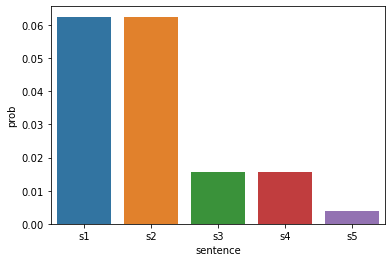

In [17]:
sns.barplot(x="sentence", y="prob", data=df_probs)

Bar chart for probabilities in log space...

<AxesSubplot:xlabel='sentence', ylabel='log_prob'>

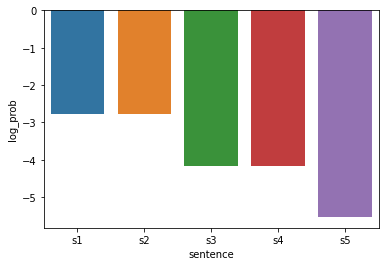

In [18]:
sns.barplot(x="sentence", y="log_prob", data=df_probs)